In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

f"Pandas version: {pd.__version__}"

'Pandas version: 2.2.3'

# Dataset: Studienanfänger: Bundesländer, Semester, Nationalität,Geschlecht

Source: Statistisches Bundesamt 

License: [Data licence Germany – attribution – Version 2.0](http://www.govdata.de/dl-de/by-2-0)

URL: https://www-genesis.destatis.de/genesis/downloads/00/tables/21311-0014_00.csv

URI: https://www.govdata.de/web/guest/suchen/-/details/studienanfanger-bundeslander-semester-nationalitatgeschlecht

## Information

### What is contained in the dataset?

The dataset contains the number of first-year students per winter semester in all 16 federal states from 1998 to 2021. Data is splitted in male and female students as well as german students and students of other nationality.

### Encoding

The file is encoded in *ISO-8859-1* (sometimes referred to as *Latin 1*). Refer to this [list of Python standard encoding](https://docs.python.org/3/library/codecs.html#standard-encodings).

### Format

From the URL we infer that the dataset is provided as a CSV file.

### File header

This is the header of the CSV file:

```
GENESIS-Tabelle: 21311-0014
Studienanfänger: Bundesländer, Semester, Nationalität,;;;;;;;;;;
Geschlecht;;;;;;;;;;
Statistik der Studenten;;;;;;;;;;
Studienanfänger (Anzahl);;;;;;;;;;
;;Deutsche;Deutsche;Deutsche;Ausländer;Ausländer;Ausländer;Insgesamt;Insgesamt;Insgesamt
;;männlich;weiblich;Insgesamt;männlich;weiblich;Insgesamt;männlich;weiblich;Insgesamt
```

## TASKs

### Task: Read in the dataframe

The column names are not provided in the csv file, we suggest to use the following ones:
|                  Content of column(s)                  |          Column title in DataFrame         |
|:---------------------------------------------------:|:------------------------------------------:|
| Federal state                                       | `"federal_state"`                              |
| Winter semester                                     | `"winter_semester"`                            |
| Count for females and males with german nationality | `"count_german_female"` and `"count_other_female"` |
| Count for females and males with other nationality  | `"count_other_female"` and `"count_other_male"`    |

*Hint*: Have a look at the *end* of the dataframe. There might be some rows that have to be removed before you can work with the data.

In [2]:
df = (
    pd.read_csv(
        ## Read the dataset
        "https://www-genesis.destatis.de/genesis/downloads/00/tables/21311-0014_00.csv",
        encoding="iso-8859-1",
        sep=";",
        skiprows=7,
        ## Limit the number of columns 
        usecols=(
            0,  # federal state
            1,  # winter semester
            2,  # german and male
            3,  # german and female
            5,  # other nationality and male
            6,  # other nationality and female
        ),
        names=[
            "federal_state", "winter_semester",
            "count_german_male", "count_german_female", 
            "count_other_male", "count_other_female"
        ],
    )
    ## The last 3 rows at the end of the dataset lead to NaN rows in the DataFrame.
    .dropna()
)

The following cells will help you check if the file has been imported as intended.

In [3]:
df.tail(10)

federal_state winter_semester  count_german_male  count_german_female  \
406     Thüringen      WS 2014/15             3227.0               3524.0   
407     Thüringen      WS 2015/16             3264.0               3548.0   
408     Thüringen      WS 2016/17             3927.0               4070.0   
409     Thüringen      WS 2017/18             3287.0               3682.0   
410     Thüringen      WS 2018/19             3077.0               3709.0   
411     Thüringen      WS 2019/20             4180.0               6150.0   
412     Thüringen      WS 2020/21             5117.0               9450.0   
413     Thüringen      WS 2021/22             5556.0              10167.0   
414     Thüringen      WS 2022/23             5222.0               9649.0   
415     Thüringen      WS 2023/24             4424.0               8188.0   

     count_other_male  count_other_female  
406             968.0              1006.0  
407             993.0               918.0  
408             949.0              1044.0  
409            1157.0              1005.0  
410            1120.0              1001.0  
411            1622.0              1577.0  
412            1467.0              1747.0  
413            1907.0              2205.0  
414            2320.0              2294.0  
415            1671.0              1560.0

In [4]:
df.head(10)

federal_state winter_semester  count_german_male  count_german_female  \
0  Baden-Württemberg      WS 1998/99            12966.0              10170.0   
1  Baden-Württemberg      WS 1999/00            13775.0              11988.0   
2  Baden-Württemberg      WS 2000/01            15696.0              13391.0   
3  Baden-Württemberg      WS 2001/02            17040.0              14816.0   
4  Baden-Württemberg      WS 2002/03            16670.0              15542.0   
5  Baden-Württemberg      WS 2003/04            18772.0              15599.0   
6  Baden-Württemberg      WS 2004/05            17264.0              14928.0   
7  Baden-Württemberg      WS 2005/06            17086.0              14870.0   
8  Baden-Württemberg      WS 2006/07            16484.0              15019.0   
9  Baden-Württemberg      WS 2007/08            16705.0              15318.0   

   count_other_male  count_other_female  
0            2580.0              2878.0  
1            3337.0              3409.0  
2            3580.0              3702.0  
3            3894.0              4146.0  
4            4252.0              4478.0  
5            4346.0              4736.0  
6            3929.0              4467.0  
7            3925.0              4098.0  
8            3687.0              4064.0  
9            3438.0              3883.0

### Task: Convert to long format

Convert the `DataFrame` to a long format with the following column labels (*Hint*: Have a look at the documentation of the [`pd.melt`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) function.): 
* `"federal_state"` and `"winter_semester"`. These are the same columns as in the original `DataFrame`.
* `"count"`: Number of first-year students of a certain nationality (other or german) and gender (female or male).
* `"nationality_and_gender"`: Column with values being one of `"count_[female|male]_[other|german]"`.

In [5]:
df = (
    pd.melt(
        df,
        id_vars=["federal_state", "winter_semester"],
        value_vars=["count_german_male", "count_german_female",
                    "count_other_male", "count_other_female"],
        var_name="nationality_and_gender", 
        value_name="count"
    )
)


In [6]:
df.head()

federal_state winter_semester nationality_and_gender    count
0  Baden-Württemberg      WS 1998/99      count_german_male  12966.0
1  Baden-Württemberg      WS 1999/00      count_german_male  13775.0
2  Baden-Württemberg      WS 2000/01      count_german_male  15696.0
3  Baden-Württemberg      WS 2001/02      count_german_male  17040.0
4  Baden-Württemberg      WS 2002/03      count_german_male  16670.0

### Task: Add new columns 

Use the content of the `"nationality_and_gender"` column to generate columns: 
* `"nationality"`: Column with values either being "german" or "other".
* `"gender"`: Column with values either being "female" or "male".
   
Finally, the column `"nationality_and_gender"` should be removed from the `DataFrame`. 

In [7]:
df = (
    df.assign(
        nationality=lambda df_: 
        df_["nationality_and_gender"]
        .str
        .replace("count_", "")
        .replace("_.*", "", regex=True),
        gender=lambda df_: 
        df_["nationality_and_gender"]
        .str
        .replace("count_", "")
        .replace(".*_", "", regex=True)
    )
    .drop(columns=["nationality_and_gender"])
)

In [8]:
df.head()

federal_state winter_semester    count nationality gender
0  Baden-Württemberg      WS 1998/99  12966.0      german   male
1  Baden-Württemberg      WS 1999/00  13775.0      german   male
2  Baden-Württemberg      WS 2000/01  15696.0      german   male
3  Baden-Württemberg      WS 2001/02  17040.0      german   male
4  Baden-Württemberg      WS 2002/03  16670.0      german   male

### Task:  Datatypes

Change the type of the columns in the following manner: 
* `"federal_state"`: category
* `"winter_semester"`: category
* `"count"`: unsigned 16 bit integer
* `"nationality"`: category
* `"gender"`: category

In [9]:
df = (
    df
    .astype({
         "count": np.uint16, 
         "nationality": "category",
         "gender": "category",
         "winter_semester": "category",
         "federal_state": "category"
    })   
)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664 entries, 0 to 1663
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   federal_state    1664 non-null   category
 1   winter_semester  1664 non-null   category
 2   count            1664 non-null   uint16  
 3   nationality      1664 non-null   category
 4   gender           1664 non-null   category
dtypes: category(4), uint16(1)
memory usage: 12.0 KB


### Task:  Visualization

Plot the count of female and male students with german nationality as well as the count of female and male students with other nationality for each winter semester (aggregated over all federal states). Choose a type of plot that allows to easily compare the count of female and male students.

Things to consider when making the plot:
* Use Pandas' plotting capabilities.
* Use axis labels, a legend, and a title.


*Hint*: You can either use the [`pivot_table`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html) or the [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) method and perform the necessary aggregations.


/tmp/ipykernel_435/3799479340.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  .pivot_table(
/tmp/ipykernel_435/3799479340.py:6: FutureWarning: The provided callable <function sum at 0x7f5db80011c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .pivot_table(


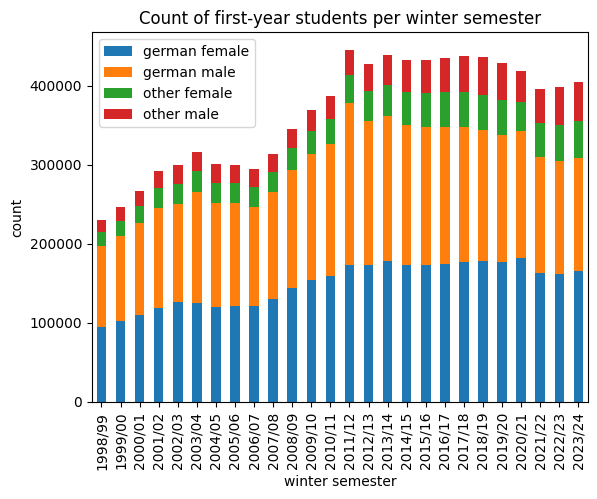

In [11]:
import re

ax = (
    df
    .assign(winter_semester=lambda df_: df_["winter_semester"].str.replace("WS ", ""))
    .pivot_table(
        index=["winter_semester"],
        columns=["nationality","gender"],
        values=["count"],
        aggfunc=np.sum
    )
    .plot
    .bar(stacked=True, logy=False)
)

ax.set_title("Count of first-year students per winter semester")
ax.set_xlabel(' '.join(ax.get_xlabel().split("_")))
ax.set_ylabel("count")

h, l = ax.get_legend_handles_labels()
# Use regular expressions to remove "(", ")", and "," contained in the labels of the legend
ax.legend(h, (''.join(re.sub(r"((\(|\))|,)", "", x)).replace("count ", "") for x in l)) 

### Task: Aggregation

What is total the percentage of female students in each  year?

In [12]:
(df
 .groupby(["winter_semester", "gender"]) 
 .sum(numeric_only=True)
 .unstack()
 .assign(percent_female=lambda df_: df_[("count", "female")] * 100 / df_.sum(axis=1)) 
)

/tmp/ipykernel_435/2013594268.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["winter_semester", "gender"])


count         percent_female
gender           female    male               
winter_semester                               
WS 1998/99       112050  118620      48.575888
WS 1999/00       121444  124874      49.303746
WS 2000/01       130852  136443      48.954152
WS 2001/02       143085  149471      48.908585
WS 2002/03       151569  148080      50.582181
WS 2003/04       151516  165140      47.848770
WS 2004/05       146132  154661      48.582248
WS 2005/06       146201  153638      48.759834
WS 2006/07       145874  149072      49.457867
WS 2007/08       156282  157258      49.844358
WS 2008/09       171325  174300      49.569620
WS 2009/10       184076  185197      49.848215
WS 2010/11       191330  195591      49.449371
WS 2011/12       207614  237706      46.621306
WS 2012/13       210736  217089      49.257524
WS 2013/14       217143  221770      49.472902
WS 2014/15       215191  217089      49.780466
WS 2015/16       216082  216507      49.950877
WS 2016/17       218959  216468      50.286041
WS 2017/18       221737  216000      50.655302
WS 2018/19       223049  212682      51.189610
WS 2019/20       221416  207633      51.606227
WS 2020/21       218783  199914      52.253300
WS 2021/22       205918  189927      52.019856
WS 2022/23       207459  190785      52.093440
WS 2023/24       211832  192968      52.330040

In [13]:
(
    df
     .query("gender == 'female'")
     ["count"]
     .sum()
) / (
    df
    ["count"]
    .sum()
) * 100 

np.float64(49.99353448593582)

Which german state has the largest / least count of female students?

In [14]:
df_agg_female = (
    df
     .pivot_table(
         index=["federal_state"],
         columns=["gender"],
         values=["count"],
         aggfunc=np.sum,
     )
     [("count", "female")]
)

df_agg_female

/tmp/ipykernel_435/3772995992.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  .pivot_table(
/tmp/ipykernel_435/3772995992.py:3: FutureWarning: The provided callable <function sum at 0x7f5db80011c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .pivot_table(


federal_state
Baden-Württemberg          653330
Bayern                     722238
Berlin                     301237
Brandenburg                101738
Bremen                      70978
Hamburg                    146221
Hessen                     385402
Mecklenburg-Vorpommern      80180
Niedersachsen              360490
Nordrhein-Westfalen       1077548
Rheinland-Pfalz            200612
Saarland                    56613
Sachsen                    225840
Sachsen-Anhalt             112014
Schleswig-Holstein         104935
Thüringen                  148279
Name: (count, female), dtype: uint64

In [15]:
df_agg_female.idxmin(), df_agg_female.idxmax()

('Saarland', 'Nordrhein-Westfalen')